# Predicting heart disease using machine learning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay

In [3]:
df=pd.read_csv("heart-disease.csv")

df.shape


(303, 14)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:

df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [6]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

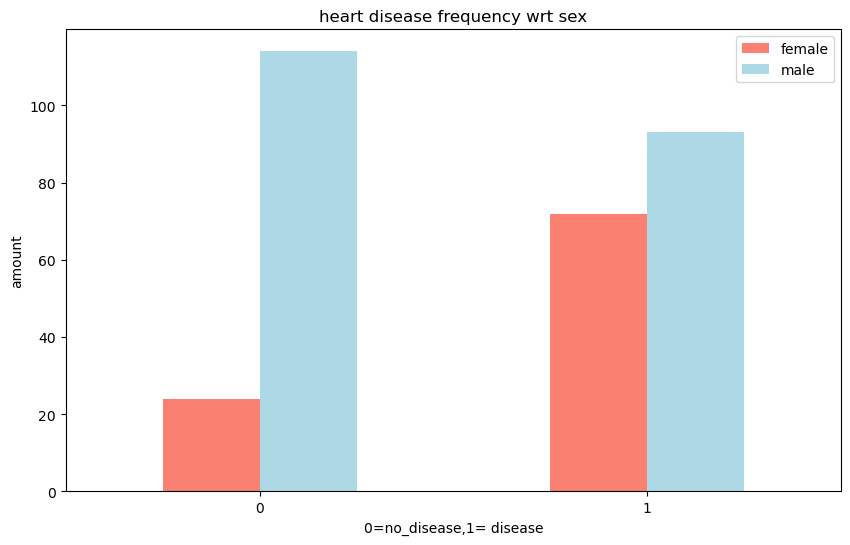

In [8]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease frequency wrt sex")
plt.xlabel("0=no_disease,1= disease")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation=1)

# age vs maximum heart rate

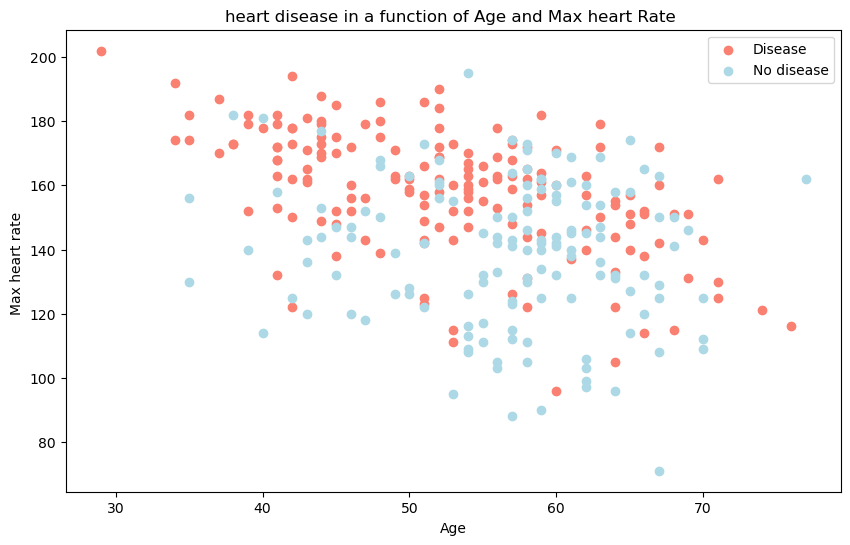

In [7]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")
plt.title("heart disease in a function of Age and Max heart Rate ")
plt.xlabel("Age")
plt.ylabel("Max heart rate ")
plt.legend(["Disease","No disease"])

<Axes: ylabel='Frequency'>

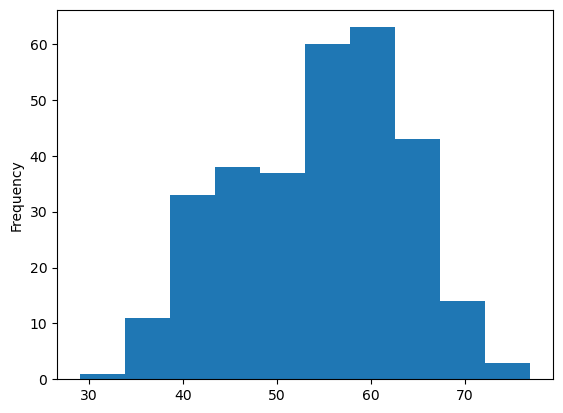

In [8]:
df.age.plot.hist()

# heart frequency per chest pain type

In [9]:
pd.crosstab(df.cp,df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

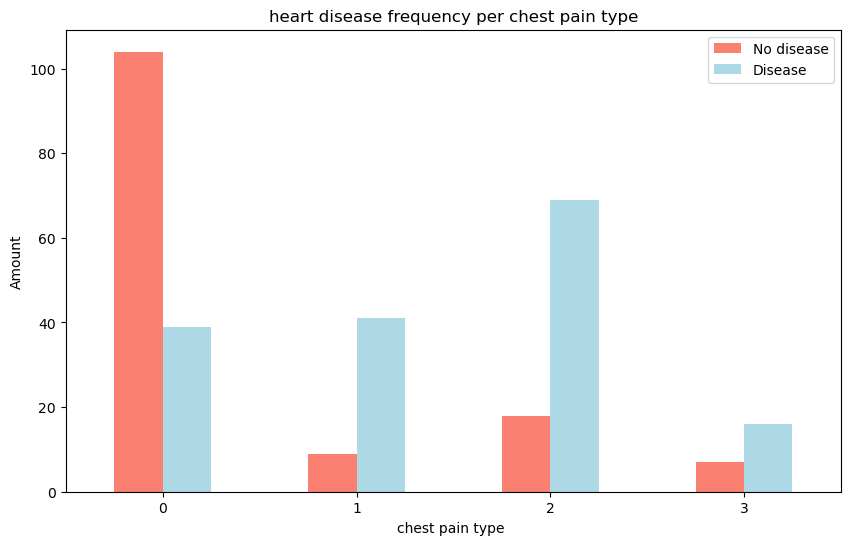

In [10]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("heart disease frequency per chest pain type")
plt.xlabel("chest pain type ")
plt.ylabel("Amount")
plt.legend(["No disease","Disease"])
plt.xticks(rotation=0)

(14.5, -0.5)

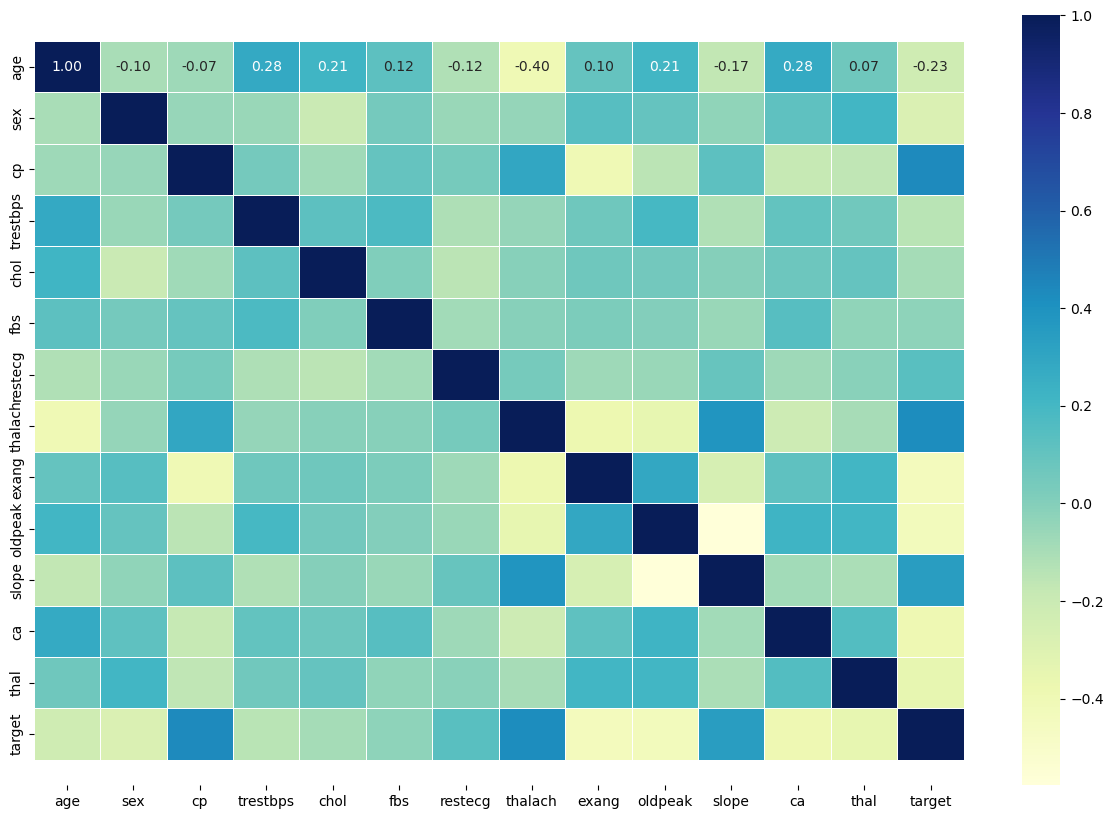

In [11]:
corr_matrix= df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt="0.2f",cmap="YlGnBu")
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)



# Modelling

In [12]:
X= df.drop("target",axis=1)
y=df["target"]

# split data into train and test sets

In [13]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

### we are going to try 3 different models
1. logistic regression
2. k -nearest neighbours classifiers
3. random forest classifier

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models dictionary with instantiated models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates different machine learning models.
    
    Parameters:
    models (dict): A dictionary of model names and instantiated model objects.
    X_train (array-like): Training data (without labels).
    X_test (array-like): Testing data (without labels).
    y_train (array-like): Training labels.
    y_test (array-like): Testing labels.
    
    Returns:
    dict: A dictionary containing the model names and their corresponding test accuracy scores.
    """
    np.random.seed(42)
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Score the model and add to the dictionary
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

# Example usage (assuming X_train, X_test, y_train, and y_test are already defined)
# model_scores = fit_and_score(models=models,
#                              X_train=X_train,
#                              X_test=X_test,
#                              y_train=y_train,
#                              y_test=y_test)
# print(model_scores)


In [15]:
model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)
model_scores

{'LogisticRegression': 0.8688524590163934,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

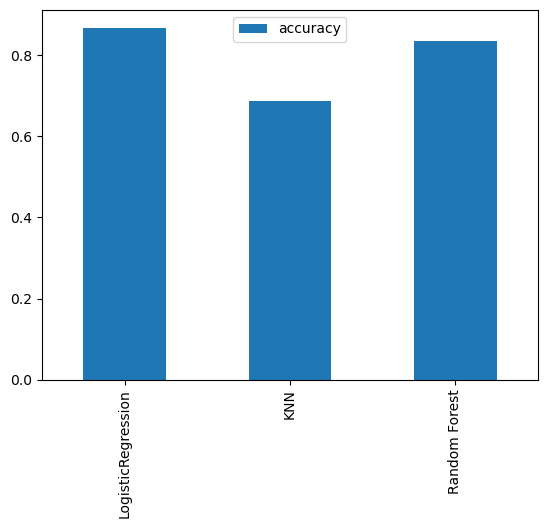

In [17]:
model_compare= pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

we have to look for following parameters
* hyperparameter tuning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* F1 score
* Classification report
* ROC curve
* Area under curve


# hyperparameter tuning


In [16]:
# lets tune KNN
train_scores=[]
test_scores=[]
neighbors=range(1,21)
knn=KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    # update training score list
    train_scores.append(knn.score(X_train,y_train))
    # update test score list
    test_scores.append(knn.score(X_test,y_test))


In [17]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [18]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:75.41%


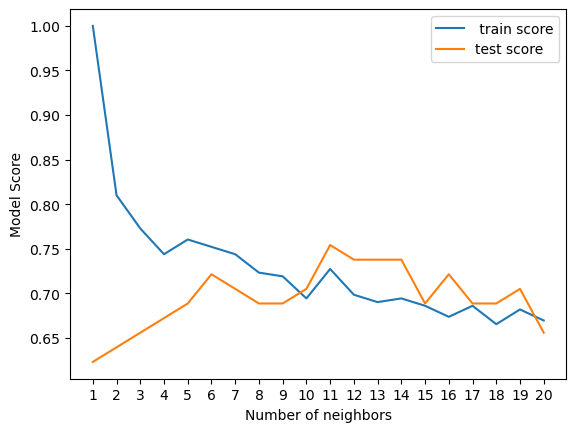

In [19]:
plt.plot(neighbors,train_scores,label=" train score")
plt.plot(neighbors,test_scores,label="test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()
print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

# Hyperparameter Tuning
we are going to tune * logesticRegression() and * RandomForestClassifier using randomized CV

In [27]:
# create a hyperparameter grid for logistic regression
log_reg_grid={"C" : np.logspace(-4,4,20),"solver":["liblinear"]}
# create a hyperparameter grid for randomForestclassifier
rf_grid= {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf" :np.arange(1,20,2) }

In [23]:
#tuning usind Randomized Search CV

#tune Logistic Regression
np.random.seed(42)
#set up hyperparameter search for logistic regression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                              cv=5,
                              n_iter=20,
                              verbose=True)
#fit random hyperparameter search model 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [26]:
#now we have tuned LogisticRegression


In [28]:
#set up random seed
np.random.seed(42)
#set up hyperparameter search for randomForestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)
#fit random hyperparameter search model 
rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [29]:
#Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [30]:
#Evaluate the random search RandomforestClassifier model
rs_rf.score(X_test,y_test)


0.8688524590163934

# hyperparameter tuning with grid search CV
since our logistic regression model provides so far best results we are trying to improve it using Grid search CV

In [31]:
log_reg_grid={ "C":np.logspace(-4,4,30),
              "solver":["liblinear"] }
gs_log_reg=GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)
#fit the grid hyperparameter search model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [32]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## evaluating our tuned model beyond accuracy
* ROC curve & AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1 score


... and cross validation used wherever possible


To make comparisons and eveluate our trained model first we need to make predictions


In [33]:
y_preds=gs_log_reg.predict(X_test)

In [34]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [35]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

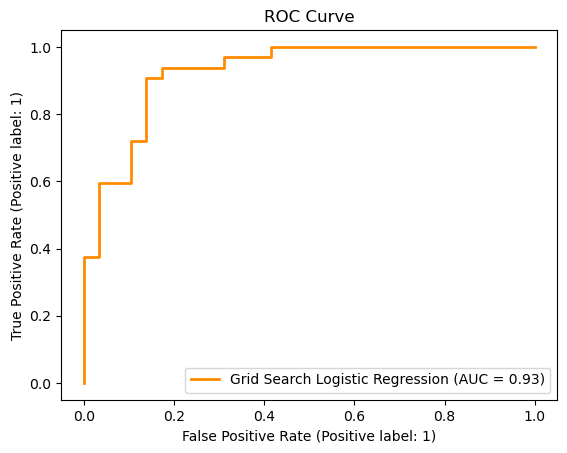

In [39]:
#plot roc curve function from sklearn andi calculate AUC metric
best_model = gs_log_reg.best_estimator_

# Plot ROC curve
fig, ax = plt.subplots()
roc_display = RocCurveDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    name='Grid Search Logistic Regression',
    color='darkorange',
    linewidth=2,
    ax=ax
)
plt.title('ROC Curve')
plt.show()


In [41]:
#confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


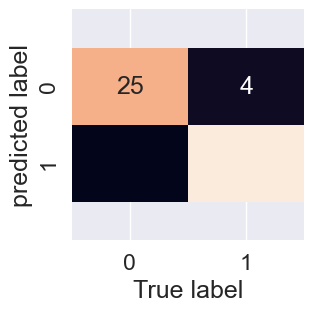

In [43]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    """
    plot a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    bottom,top=ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5)
plot_conf_mat(y_test,y_preds)    


    

In [44]:
#lets get classification report 
print(classification_report(y_test,y_preds)) 

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
# we are going to calulate precision, recall and f1 score using cross validation
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [46]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")

In [49]:
#cross-validation accuracy
cv_acc=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [50]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [52]:
#cross-validation precision
cv_precision=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [55]:
#cross-validation recall
cv_recall=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring= "recall" )
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [57]:
#cross-validation f1 score
cv_f1=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring= "f1" )
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

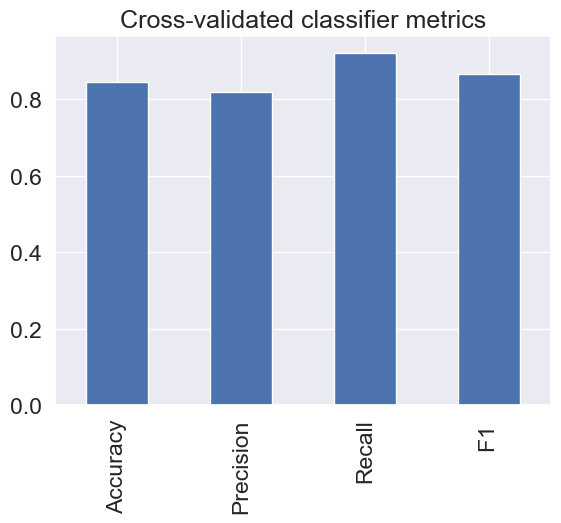

In [60]:
#visualize cross value metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_precision,
                         "Recall":cv_recall,
                         "F1 ":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classifier metrics",legend=False);


### feature importance
which features contributed most to the outcomes of model and how did they contribute
find feature importance is different of each ml model


In [61]:
clf=LogisticRegression(C=0.20433597178569418,
                       solver="liblinear")
clf.fit(X_train,y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [62]:
clf.coef_
#check coefficients

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [63]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

<Axes: title={'center': 'Feature Importance'}>

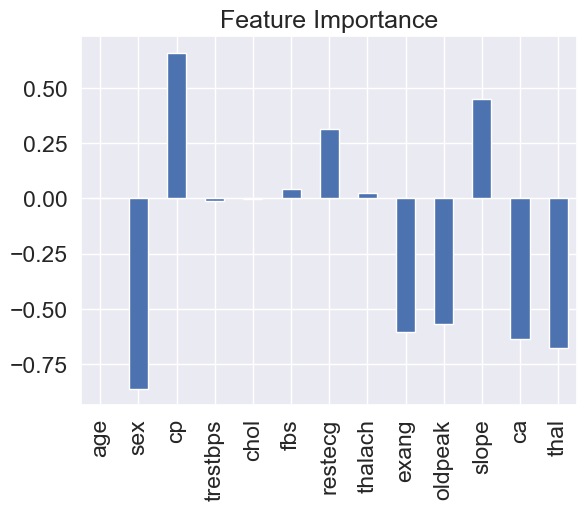

In [64]:
# Visualize feature importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

### experimentation
